<a href="https://colab.research.google.com/github/bnegash/CS4662/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras


# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

from tensorflow.keras import layers
np.random.seed(0)

In [2]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


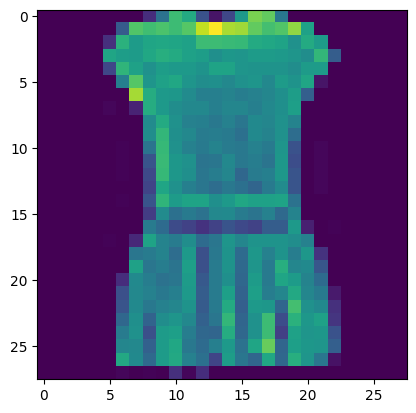

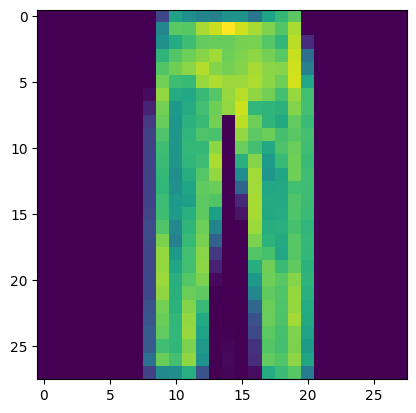

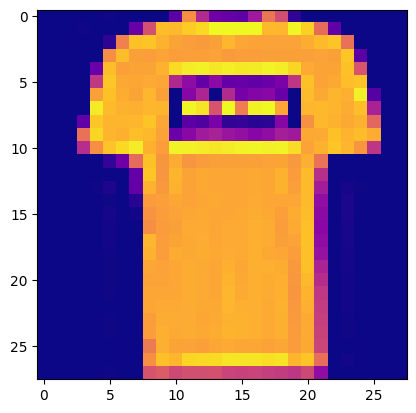

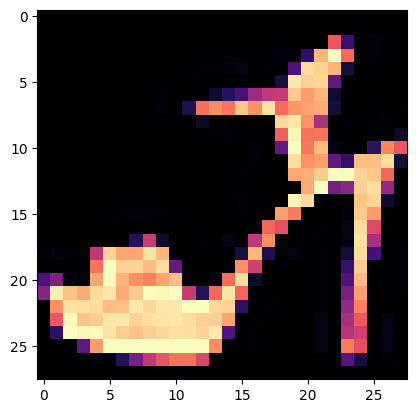

In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [6]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [7]:
# Declare Sequential model fro our network:
model = Sequential()


# CNN first layer (with 64 3x3 filter):
model.add(Convolution2D(128, (3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
print(model.output_shape) # with no zero padding -> (None, 28, 28, 64)

# second CNN layer (with 64 3x3 filter):
model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# third CNN layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

(None, 28, 28, 128)
(None, 28, 28, 64)
(None, 28, 28, 32)


In [8]:
# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

# fourth CNN layer (with 16 3x3 filter):
model.add(Convolution2D(16, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

(None, 14, 14, 32)
(None, 14, 14, 16)


In [9]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(256, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 3136)
(None, 256)
(None, 128)
(None, 10)


In [10]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

In [11]:
keras.utils.plot_model(model, show_shapes=True)
history = model.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1, validation_split=0.25)

Epoch 1/30
176/176 [==============================] - 25s 54ms/step - loss: 0.7794 - accuracy: 0.7186 - val_loss: 0.3862 - val_accuracy: 0.8551
Epoch 2/30
176/176 [==============================] - 8s 43ms/step - loss: 0.4339 - accuracy: 0.8475 - val_loss: 0.3034 - val_accuracy: 0.8872
Epoch 3/30
176/176 [==============================] - 8s 44ms/step - loss: 0.3532 - accuracy: 0.8759 - val_loss: 0.2749 - val_accuracy: 0.8980
Epoch 4/30
176/176 [==============================] - 8s 44ms/step - loss: 0.3134 - accuracy: 0.8902 - val_loss: 0.2521 - val_accuracy: 0.9049
Epoch 5/30
176/176 [==============================] - 8s 43ms/step - loss: 0.2824 - accuracy: 0.9008 - val_loss: 0.2342 - val_accuracy: 0.9115
Epoch 6/30
176/176 [==============================] - 8s 43ms/step - loss: 0.2620 - accuracy: 0.9062 - val_loss: 0.2276 - val_accuracy: 0.9179
Epoch 7/30
176/176 [==============================] - 8s 45ms/step - loss: 0.2463 - accuracy: 0.9142 - val_loss: 0.2200 - val_accuracy: 0.919

In [12]:
# Training with callbacks:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0)
fitted_model = model.fit(X_train, y_train, validation_split=0.25, 
                       batch_size=256, epochs=60, callbacks=[callback], verbose=1)

# min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
# patience: Number of epochs with no improvement after which training will be stopped.

Epoch 1/60
176/176 [==============================] - 8s 44ms/step - loss: 0.0904 - accuracy: 0.9669 - val_loss: 0.2513 - val_accuracy: 0.9332
Epoch 2/60
176/176 [==============================] - 8s 43ms/step - loss: 0.0877 - accuracy: 0.9685 - val_loss: 0.2598 - val_accuracy: 0.9317
Epoch 3/60
176/176 [==============================] - 7s 43ms/step - loss: 0.0867 - accuracy: 0.9686 - val_loss: 0.2484 - val_accuracy: 0.9361
Epoch 4/60
176/176 [==============================] - 8s 43ms/step - loss: 0.0808 - accuracy: 0.9708 - val_loss: 0.2374 - val_accuracy: 0.9344
Epoch 5/60
176/176 [==============================] - 8s 44ms/step - loss: 0.0802 - accuracy: 0.9710 - val_loss: 0.2467 - val_accuracy: 0.9354
Epoch 6/60
176/176 [==============================] - 8s 44ms/step - loss: 0.0792 - accuracy: 0.9714 - val_loss: 0.2616 - val_accuracy: 0.9319
Epoch 7/60
176/176 [==============================] - 8s 44ms/step - loss: 0.0800 - accuracy: 0.9706 - val_loss: 0.2456 - val_accuracy: 0.9345

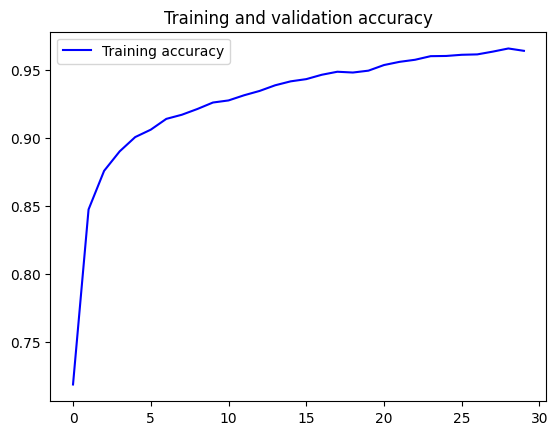

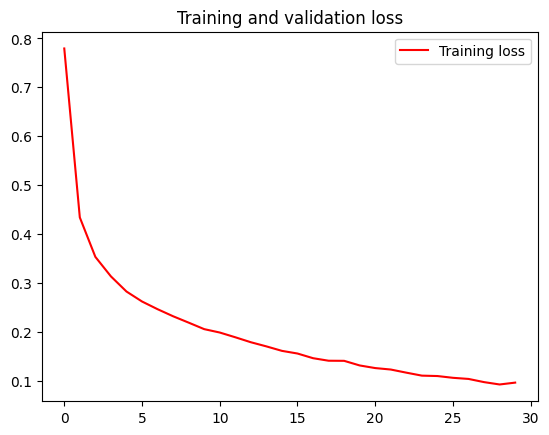

In [13]:
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# val_accuracy = history.history.get('val_accuracy')  # change this line
loss = history.history['loss']
# val_loss = history.history.get('val_loss')  # change this line
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b-', label='Training accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')

plt.title('Training and validation loss')
plt.legend()


# plt.show()

In [14]:
predicted_classes = model.predict(X_test)
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2668 - accuracy: 0.9353
The accuracy is:  0.9352999925613403
